<a href="https://colab.research.google.com/github/VIVEKMUNNAA/Regression/blob/main/Servo_Prediction_Project_(Vivek_Munnaa_D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SERVO PREDICTION USING LINEAR REGRESSION**

## **Objective**

**SERVO:** In control engineering a servomechanism, usually shortened to servo, is an automatic device that uses error-sensing negative feedback to correct the action of a mechanism. On displacement-controlled applications,it usually includes a built-in encodes or other position feedback mechanism to ensure the output is achieving the desired effect.The term correctly applies only to systems where the feedback or error-correction signals help control mechanical position,speed,atitude or any other measurable variables.For examples, an automotive power window control is not a servomechanism,as there is no automatic feedback that controls position - the operator does this by obeservation.By contrast a car's cruise control uses closed-loop feedback,which classifies it as a servomechanism.

A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class.The data set is from a simulation of a servo system involving a servo amplifier,a motor,a lead screw,nut and a sliding carriage of some sort.It may have been on of the translational axes of a robot pn the 9th floor of the AI lab. In any case,the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point.The variables that describe the data set and their values are the following:

1.Motor A,B,C,D,E


2.Screw A,B,C,D,E



3.Pgain 3,4,5,6


4.Vgain 1,2,3,4,5


5.Class 0.13 to 7.10



## **Data Source**

The data set is rooted from the below link from github of ybi-foundation as a csv file. The data frame has about 167 observations.

https://github.com/YBI-Foundation/Dataset/blob/main/Servo%20Mechanism.csv

##**Import Library**

In [ ]:
import pandas as pd


In [ ]:
import numpy as np

## **Import Data**

In [ ]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

The dataframe has been imported using the URL directly.

## **Describe Data**

In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [ ]:
df.head()


,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


# **Data Visualization**

In [ ]:
df.columns


Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [ ]:
df.shape

(167, 5)

In [ ]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [ ]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

#**Data Preprocessing**

In [ ]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [ ]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

# **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
y=df['Class']


In [ ]:
y.shape

(167,)

In [ ]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [ ]:
X = df[['Motor','Screw','Pgain','Vgain']]

In [ ]:
X = df.drop('Class',axis=1)

In [ ]:
X.shape

(167, 4)

In [ ]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.3,random_state=2529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

# **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred.shape

(51,)

In [ ]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

# **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [ ]:
mean_absolute_error(y_test,y_pred)

7.190539677251235

In [ ]:
r2_score(y_test,y_pred)

0.6807245170563927

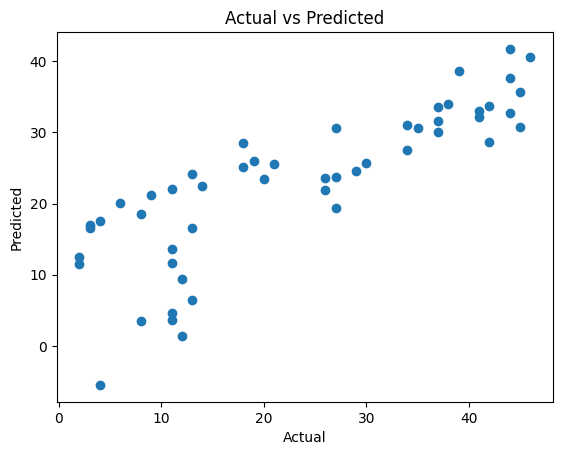

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# **Predictions**

In [ ]:
X_new = df.sample(1)


In [ ]:
X_new

,Motor,Screw,Pgain,Vgain,Class
47,4,3,4,2,8


In [ ]:
X_new.shape

(1, 5)

In [ ]:
X_new = X_new.drop('Class',axis=1)

In [ ]:
X_new


,Motor,Screw,Pgain,Vgain
47,4,3,4,2


In [ ]:
X_new.shape

(1, 4)

In [ ]:
y_pred_new = lr.predict(X_new)

In [ ]:
y_pred_new

array([12.95737261])

# **Explaination**

This project is about servomechanism prediction using linear regression. Initially, we import the library files of pandas and numpy. Then,we root and import the dataset from the given github link of ybi foundation as a csv file. This dataframe has about 167 observations.Then we describe the data using .describe() followed by .head() and .info(). After describing we visualize the data also known as data Visualization and fetch the shape, column and other required info. Now data preprocessing is done using .replace() method, then we define the target variable(y) and feature variable(x). Here we also fetch the information about the data shape. Now we import the train_test_split from sklearn.model_selection for train-test split of the dataset. Then modeling is done, as we are using a linear model, we are required to import a LinearRegression from linear_model then we prdict y for a given x. After modeling we must evaluate the model using certain metrics, these include mean_squared_error, mean_absolute_error, r2_score.Then finally we make future predictions about the model us .sample(), .drop() method followed by the .predict() method.Thus the servomechanism Prediction model using linear regression is implemented successfully.